# Just want to play with the OOI API 
I want to basically follow some of the simple examples from the OOI workshops to get and plot data

This first bit is about building the request for data from a particular instrument. You are basically navigating a directory structure, and the request is like sending you the output of dir


In [2]:
USERNAME  = 'OOIAPI-M3ZHX5W9PVAPNQ'
TOKEN =  'TEMP-TOKEN-MM09XIOFPM8QV2'

# the sensor base URL is the path to all sensor info
SENSOR_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

In [3]:
# First, we need to add some more Python libraries
import requests
import datetime

In [4]:
# get a list of all the site info:
r = requests.get(SENSOR_BASE_URL, auth=(USERNAME, TOKEN))

# now output all the site info:

sites = r.json()
for site in sites:
  print( site )

CE01ISSM
CE01ISSP
CE02SHBP
CE02SHSM
CE02SHSP
CE04OSBP
CE04OSPD
CE04OSPI
CE04OSPS
CE04OSSM
CE05MOAS
CE06ISSM
CE06ISSP
CE07SHSM
CE07SHSP
CE09OSPM
CE09OSSM
CP01CNPM
CP01CNSM
CP01CNSP
CP02PMCI
CP02PMCO
CP02PMUI
CP02PMUO
CP03ISPM
CP03ISSM
CP03ISSP
CP04OSPM
CP04OSSM
CP05MOAS
GA01SUMO
GA02HYPM
GA03FLMA
GA03FLMB
GA05MOAS
GI01SUMO
GI02HYPM
GI03FLMA
GI03FLMB
GI05MOAS
GP02HYPM
GP03FLMA
GP03FLMB
GP05MOAS
GS01SUMO
GS02HYPM
GS03FLMA
GS03FLMB
GS05MOAS
RS01OSBP
RS01SBPD
RS01SBPS
RS01SHBP
RS01SHDR
RS01SLBS
RS01SUM1
RS01SUM2
RS03ASHS
RS03AXBS
RS03AXPD
RS03AXPS
RS03AXSM
RS03CCAL
RS03ECAL
RS03INT1
RS03INT2
SSRSPACC


In [5]:
# A quick function to make an API request and print the results
def get_and_print_api(url):
  r = requests.get(url, auth=(USERNAME, TOKEN))
  data = r.json()
  for d in data:
    print( d )

List of nodes for a site

In [6]:
# lets look at the Irminger sea site
get_and_print_api(SENSOR_BASE_URL+'/GI02HYPM')

RIM01
WFP02


In [7]:
# lets look at the profiler instruments
get_and_print_api(SENSOR_BASE_URL+'/GI02HYPM/WFP02')

00-WFPENG000
01-FLORDL000
03-DOSTAL000
04-CTDPFL000
05-VEL3DL000


In [8]:
# list the methods for the sensor
get_and_print_api(SENSOR_BASE_URL+'/GI02HYPM/WFP02/04-CTDPFL000')

recovered_wfp
telemetered


In [9]:
# list the streams for a method
get_and_print_api(SENSOR_BASE_URL+'/GI02HYPM/WFP02/04-CTDPFL000/recovered_wfp')

ctdpf_ckl_wfp_instrument_recovered
ctdpf_ckl_wfp_metadata_recovered



From here if we add one of these streams to the data request, we will get the data:

get_and_print_api(SENSOR_BASE_URL+'/GI02HYPM/WFP02/04-CTDPFL000/recovered_wfp/ctdpf_ckl_wfp_instrument_recovered')

This is an asynchronous request, and we will get all of it. Sounds like this causes some problems on the server side right now

Instead, we should set up a synchronous request that sends back a quick decimated version of the data for Expoloator purposes

# Create quick, EDA, synchronous request

build up the request


In [10]:

# Instrument Information# 
site = 'GI02HYPM' 
node = 'WFP02'
instrument = '04-CTDPFL000'
method = 'recovered_wfp'
stream = 'ctdpf_ckl_wfp_instrument_recovered'

data_request_url ='/'.join((SENSOR_BASE_URL,site,node,instrument,method,stream))

params = {
  'beginDT':'2017-10-24T00:00:00.000Z',
  'endDT':'2017-10-28T00:00:00.000Z',
  'limit':5000,   
}


In [11]:
# Grab the data
r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
data = r.json()

In [12]:
data[0]

{'practical_salinity': 34.88065769854654,
 'ctdpf_ckl_seawater_conductivity_qc_results': 29,
 'ctdpf_ckl_seawater_pressure_qc_executed': 29,
 'ctdpf_ckl_seawater_temperature_qc_results': 29,
 'density_qc_executed': 29,
 'driver_timestamp': 3741992266.523341,
 'conductivity': 321066,
 'practical_salinity_qc_results': 29,
 'temperature': 68161,
 'density': 1039.6014871819534,
 'ctdpf_ckl_seawater_pressure': 2552.14,
 'internal_timestamp': 3717771675.9989367,
 'pk': {'node': 'WFP02',
  'stream': 'ctdpf_ckl_wfp_instrument_recovered',
  'subsite': 'GI02HYPM',
  'deployment': 4,
  'time': 3717771675.9989367,
  'sensor': '04-CTDPFL000',
  'method': 'recovered_wfp'},
 'ctdpf_ckl_seawater_conductivity_qc_executed': 29,
 'ctdpf_ckl_seawater_temperature': 1.8160999999999996,
 'ingestion_timestamp': 3741992267.742,
 'port_timestamp': 0.0,
 'time': 3717771675.9989367,
 'pressure': 256214,
 'ctdpf_ckl_seawater_pressure_qc_results': 29,
 'preferred_timestamp': 'internal_timestamp',
 'practical_salini

In [13]:
import pandas as pd
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [14]:
# convert to pandas dataframe
profiler = pd.read_json(json.dumps(data))

# grab just a few columns:
profiler = profiler[['time', 'ctdpf_ckl_seawater_pressure', 'ctdpf_ckl_seawater_temperature', 'density', 'practical_salinity']]

profiler.head()

,time,ctdpf_ckl_seawater_pressure,ctdpf_ckl_seawater_temperature,density,practical_salinity
0,3.717772e+09,2552.14,1.8161,1039.601487,34.880658
1,3.717835e+09,2553.72,1.8799,1039.598010,34.878902
2,3.717835e+09,2553.60,1.8815,1039.597579,34.879330
3,3.717835e+09,2553.68,1.8832,1039.597964,34.879679
4,3.717835e+09,2549.57,1.8930,1039.578055,34.879471


In [15]:
# timestamps are seconds since jan 1 1900, so need some script to convert

# Time Processing Routine
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()

def ntp_seconds_to_datetime(ntp_seconds):
    return datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)

convert the time stamps for the data, rename columns, and set the index of the pandas dataframe so you can use timeseries tools

In [16]:
profiler['datetime'] = profiler['time'].apply(ntp_seconds_to_datetime)
profiler = profiler.set_index('datetime')
profiler.rename(columns={'ctdpf_ckl_seawater_pressure': 'pressure',
                        'ctdpf_ckl_seawater_temperature': 'temperature'}, inplace=True)
profiler.head()

,time,pressure,temperature,density,practical_salinity
datetime,,,,,
2017-10-23 18:21:15,3.717772e+09,2552.14,1.8161,1039.601487,34.880658
2017-10-24 12:00:02,3.717835e+09,2553.72,1.8799,1039.598010,34.878902
2017-10-24 12:00:08,3.717835e+09,2553.60,1.8815,1039.597579,34.879330
2017-10-24 12:01:17,3.717835e+09,2553.68,1.8832,1039.597964,34.879679
2017-10-24 12:02:26,3.717835e+09,2549.57,1.8930,1039.578055,34.879471


plot the profiler casts

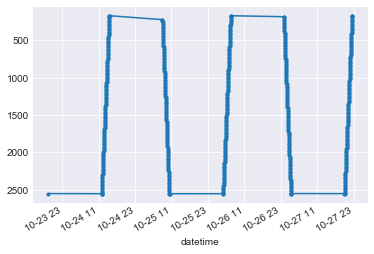

In [17]:
profiler['pressure'].plot(kind='line', marker='.').invert_yaxis()

Text(0.5,0,'Salinity')

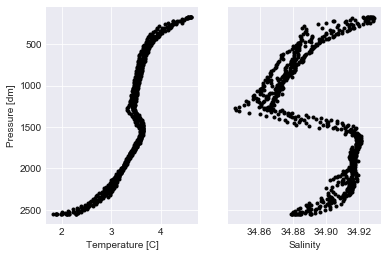

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(profiler.temperature, profiler.pressure, 'k.')
ax1.invert_yaxis()
ax1.set_xlabel('Temperature [C]')
ax1.set_ylabel('Pressure [dm]')

ax2.plot(profiler.practical_salinity, profiler.pressure, 'k.')
ax2.set_xlabel('Salinity')



In [27]:
import cmocean

Text(0,0.5,'Temperature [C]')

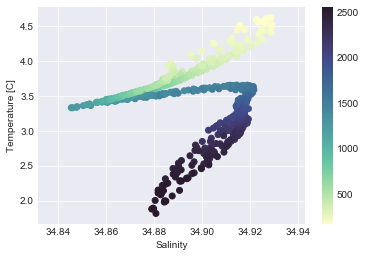

In [20]:
sc = plt.scatter(profiler.practical_salinity, profiler.temperature, c = profiler.pressure, cmap=cmocean.cm.deep)

plt.colorbar(sc)
plt.xlabel('Salinity')
plt.ylabel('Temperature [C]')

(736625.0, 736630.0)

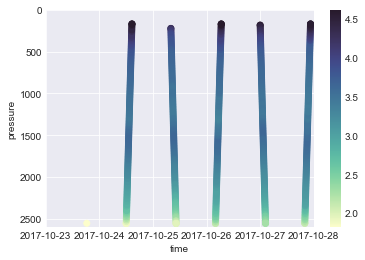

In [26]:
sc = plt.scatter(profiler.index, profiler.pressure, c = profiler.temperature, cmap=cmocean.cm.deep)

plt.colorbar(sc)
plt.xlabel('time')
plt.ylabel('pressure')
plt.ylim(2600, 0)
# plt.axis('tight')
plt.xlim(pd.Timestamp('2017-10-23'), pd.Timestamp('2017-10-28'))